# Pytorch Workflow

In [7]:
import torch 
from torch import nn  # neural network
import matplotlib.pyplot as plt

torch.__version__ 

'2.1.0+cu121'

## 1. Data preparing and loading

Using linear regression formula as data

In [8]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1) # unsqueeze(1) adds a dimension to the tensor
y = weight * X + bias
len(X), len(y)

(50, 50)

### Split the data into training and test sets

In [9]:
train_size = int(len(X) * 0.8)
XTrain, yTrain = X[:train_size], y[:train_size]
XTest, yTest = X[train_size:], y[train_size:]

### Visualize Data

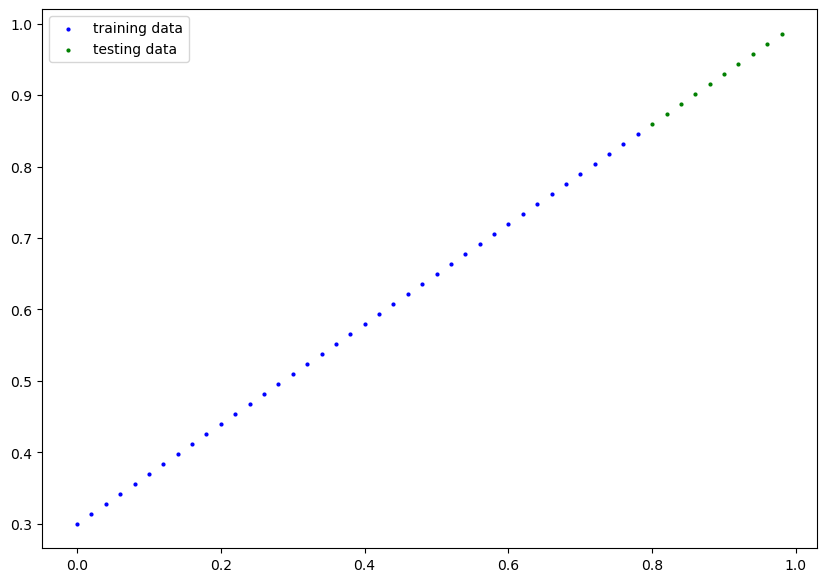

In [10]:
def plotPredictions(trainData, trainLabels, testData, testLabels, predicted=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(trainData.numpy(), trainLabels.numpy(), s = 4, color='blue', label='training data')
    plt.scatter(testData.numpy(), testLabels.numpy(), s = 4, color='green', label='testing data')
    if predicted is not None:
        plt.scatter(testData.numpy(), predicted.numpy(), s = 4, color='red', label='predictions')
    plt.legend()
    plt.show()

plotPredictions(XTrain, yTrain, XTest, yTest)

## 2. Build Model

In [12]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
                
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x: training data
        return self.weights * x + self.bias  # linear regression model

In [17]:
# Create a random seed
torch.manual_seed(42)
model0 = LinearRegressionModel()
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
with torch.inference_mode():
    yPreds = model0(XTest)
yPreds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

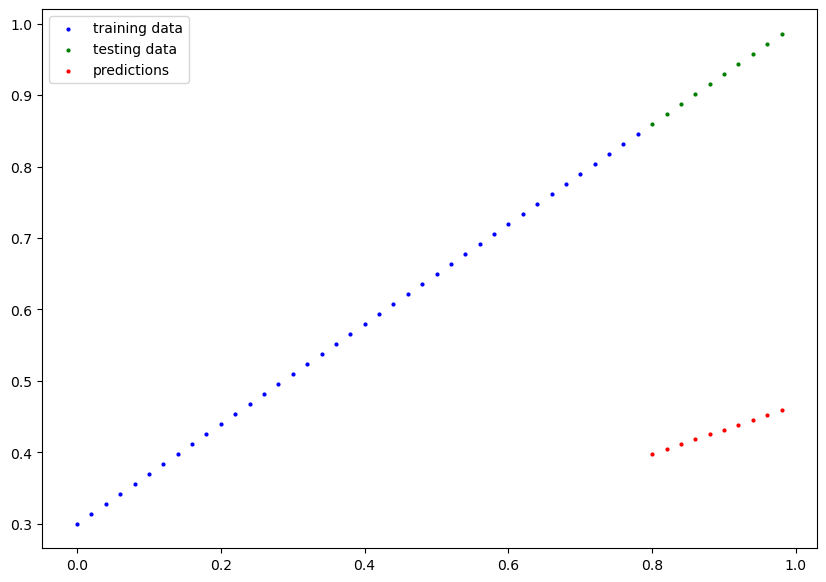

In [21]:
plotPredictions(XTrain, yTrain, XTest, yTest, yPreds)